<a href="https://colab.research.google.com/github/ancastillar/Projects-Advanced-Topics-in-Statistics/blob/main/An%C3%A1lisis_Sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from gensim.models import word2vec
pd.options.display.max_colwidth = 200
from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')
%matplotlib inline

ruta = "/content/drive/MyDrive/taller_sentimientos_topicos/"

# import the existing word and sentence tokenizing  
# libraries 
import nltk


# tokenizadores
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import TweetTokenizer

# diccionarios especiales para puntuación y palabras vacias
nltk.download('punkt') # Manejo de puntuación
nltk.download('stopwords')
import re
# wordnet
nltk.download('wordnet')

from nltk.corpus import stopwords
import tensorflow as tf
# lematizador basado en WordNet de nltk
from nltk.stem import WordNetLemmatizer 

# steemer de nltk. Raiz de las palabras
#from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
  
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from pprint import pprint
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



#####################################Modelo

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras import backend as K

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Punto 1

Vamos a hacer dos análisis de sentimientos.

Use el conjunto de datos airlines.zip tomado de Kaggle.

Haga una análisis de sentimientos

1. Usando un modelo logístico
2. Usando Naive Bayes
3. Usando Support Vector Machine (SVM)
4. Usando una red neuronal.
5. Compare los resultados

**Cargue de los datos**

In [ ]:
df = pd.read_csv(ruta+"Tweets.csv")

In [ ]:
print("Dimensión del dataframe:",df.shape)
df.head(5)

Dimensión del dataframe: (14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Eliminación de algunas características que no son útiles**

In [ ]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']

**Nuestra variable de interés es Text**

In [ ]:
df['text']

0                                                                                                                           @VirginAmerica What @dhepburn said.
1                                                                                      @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                                                       @VirginAmerica I didn't today... Must mean I need to take another trip!
3                                @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                                                       @VirginAmerica and it's a really big bad thing about it
                                                                                  ...                                                                          
14635                                   

**Preprocesamiento del texto**
------------------------------------

**Primero realizamos la tokenización**

In [ ]:
def limpieza(x):
    lemmatizer = WordNetLemmatizer()   
    solo_letras= re.sub("[^a-zA-Z]", " ",x)  
    solo_letras = re.sub(r'\b\w{1,3}\b', '', solo_letras) 
    words = solo_letras.split()                           
    stops = set(stopwords.words("english"))                  
    palabras_significativas = [w for w in words if not w in stops]
    texto = [lemmatizer.lemmatize(word) for word in palabras_significativas]
    return( " ".join(texto )) 
    

In [ ]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)


#Normalización del texto
df['text'] = df['text'].apply(lambda x: x.lower())

#Tokenización
df['text_prepross'] = df['text'].apply(lambda x: tknzr.tokenize(x))
df['text_prepross'] = df['text_prepross'].apply(lambda x: " ".join(x))

#Limpieza de texto y lematizacion
df['text_prepross'] = df['text_prepross'].apply(lambda x: limpieza(x))


In [ ]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,text_prepross
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@virginamerica what @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@virginamerica plus you've added commercials to the experience... tacky.,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercial experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@virginamerica i didn't today... must mean i need to take another trip!,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,"@virginamerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainment guest face little recourse
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@virginamerica and it's a really big bad thing about it,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@americanair thank you we got on a different flight to chicago.,2015-02-22 12:01:01 -0800,NaN,NaN,thank different flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@americanair leaving over 20 minutes late flight. no warnings or communication until we were 15 minutes late flight. that's called shitty customer svc,2015-02-22 11:59:46 -0800,Texas,NaN,leaving minute late flight warning communication minute late flight called shitty customer
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,sanyabun,0,@americanair please bring american airlines to #blackberry10,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,please bring american airline blackberry
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@americanair you have my money, you change my flight, and don't answer your phones! any other suggestions so i can make my commitment??",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight answer phone suggestion make commitment


**Para la clasificación eliminamos los tweets neutros**

In [ ]:
df = df[df.airline_sentiment!='neutral']
print(df['airline_sentiment'].value_counts())

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64


**Convertimos nuestra variable objetivo a numérica**

In [ ]:
# convert airline_seentiment to numeric
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x=='positive' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Vectorización del texto**
--------------------------------------------

**Primero separamos la muestra de entrenamiento de la muestra de prueba** 

Usamos el 80% para la muestra de entrenamiento

In [ ]:
X = df['text_prepross']
y = df[['airline_sentiment']]
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50, stratify=y)

**Vectorización mediante TF-IDF**

In [ ]:
vectorizador = TfidfVectorizer()
train_vectors = vectorizador.fit_transform(X_train)
test_vectors = vectorizador.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(9232, 7724) (2309, 7724)


**Modelos clásicos**
-----------------------------

In [ ]:
clasificadores = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    RandomForestClassifier(n_estimators=200),
    GaussianNB()]

In [ ]:
dense_features=train_vectors.toarray()
dense_test= test_vectors.toarray()
Accuracy=[]
F1_score= []
Model=[]
for classifier in clasificadores:
    try:
        fit = classifier.fit(train_vectors,y_train)
        pred = fit.predict(test_vectors)
    except Exception:
        fit = classifier.fit(dense_features,y_train)
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,y_test)
    f1 = f1_score(pred, y_test)

    Accuracy.append(accuracy)
    F1_score.append(f1)

    Model.append(classifier.__class__.__name__)
    print('Accuracy de '+classifier.__class__.__name__+'is '+str(accuracy))    
    print('F1-Score de'+classifier.__class__.__name__+'is '+str(f1))   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy de LogisticRegressionis 0.7951494153313122
F1-Score deLogisticRegressionis 0.0
Accuracy de KNeighborsClassifieris 0.8544824599393677
F1-Score deKNeighborsClassifieris 0.5240793201133144


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy de SVCis 0.8181030749242096
F1-Score deSVCis 0.20152091254752855


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy de RandomForestClassifieris 0.8999566912083153
F1-Score deRandomForestClassifieris 0.7272727272727273


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy de GaussianNBis 0.6634906886097878
F1-Score deGaussianNBis 0.4871287128712871


**Comparación de los resultados de los modelos clásicos de clasificación**

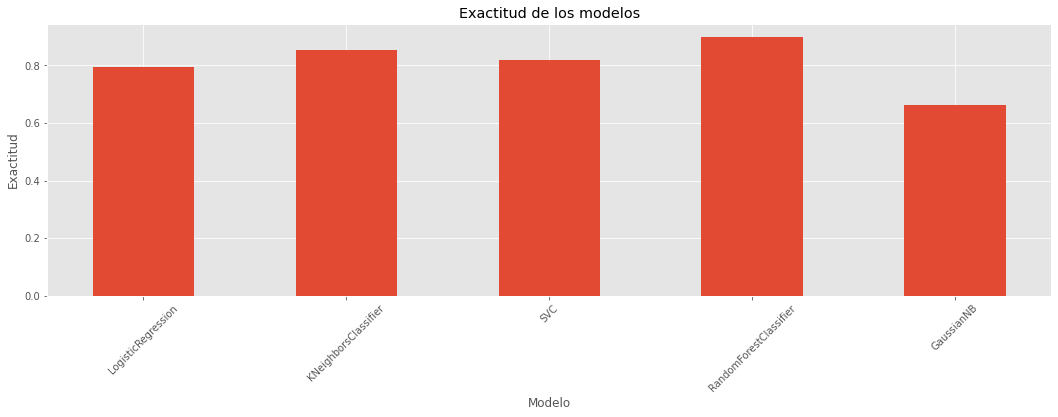

In [ ]:
Index = [1,2,3,4,5]
plt.figure(figsize=(18,5))
plt.bar(Index,Accuracy, width=0.5)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Exactitud')
plt.xlabel('Modelo')
plt.title('Exactitud de los modelos');

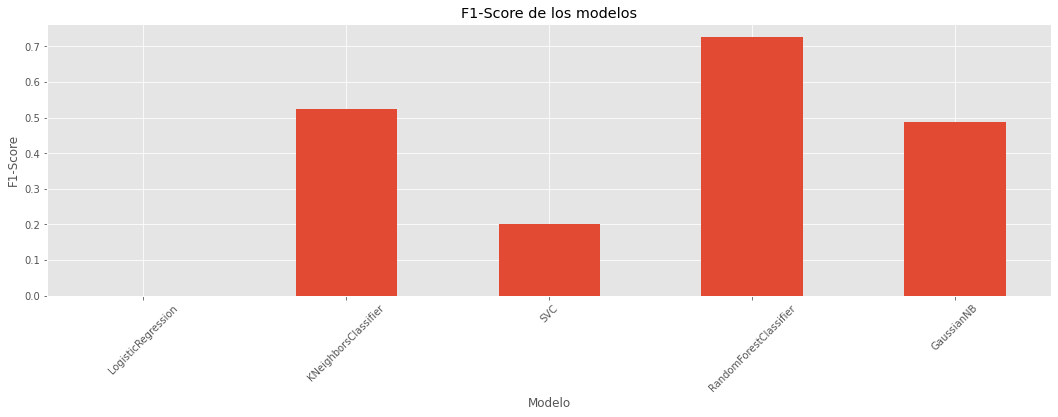

In [ ]:
Index = [1,2,3,4,5]
plt.figure(figsize=(18,5))
plt.bar(Index,F1_score, width=0.5)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('F1-Score')
plt.xlabel('Modelo')
plt.title('F1-Score de los modelos');

**Con lo anterior podemos concluir que el mejor resultado se obtiene con el modelo de Random Forest, seguido por el modelo de KNN**

**Redes neuronales**
------------------------------------

In [ ]:
X_train

4041                                       bringing game premium cabin dining nice http zgoqoxjbqy
4075                                 feel well informed flight indeed delayed thank http fuchzrzjg
3000                                      money sucking airline terrible terrible customer service
7180                                                  letting select city strange fair look normal
1970     cancelled flight flight sends email saying think next flight customer outrage http kkwiwi
                                                   ...                                            
13067              expect spend hard earn make exception extra call volume however never make acpt
4941                           sort arriving late flight incur overnight cost connecting city cool
3531                                                                                         thank
11414                                      would though entire process people phone usairwayssucks
5545      

In [ ]:
tweet = X_train
tweet_test = X_test
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
encoded_docs_train = tokenizer.texts_to_sequences(tweet)
encoded_docs_test = tokenizer.texts_to_sequences(tweet_test)
padded_sequence_train = pad_sequences(encoded_docs_train, maxlen=200)
padded_sequence_test = pad_sequences(encoded_docs_test, maxlen=200)


In [ ]:
print(padded_sequence_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  974 1514  867  520
 2016 

**Modelo con Keras**

In [57]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy', f1_m])  
print(model.summary()) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 32)           247200    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 263,851
Trainable params: 263,851
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(padded_sequence_train,y_train,validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
231/231 [==============================] - 62s 253ms/step - loss: 0.4457 - accuracy: 0.8196 - f1_m: 0.1742 - val_loss: 0.3366 - val_accuracy: 0.8544 - val_f1_m: 0.5984
Epoch 2/5
231/231 [==============================] - 59s 254ms/step - loss: 0.2299 - accuracy: 0.9109 - f1_m: 0.7301 - val_loss: 0.2598 - val_accuracy: 0.8917 - val_f1_m: 0.7111
Epoch 3/5
231/231 [==============================] - 56s 243ms/step - loss: 0.1669 - accuracy: 0.9384 - f1_m: 0.8274 - val_loss: 0.2714 - val_accuracy: 0.8928 - val_f1_m: 0.7141
Epoch 4/5
231/231 [==============================] - 56s 244ms/step - loss: 0.1366 - accuracy: 0.9500 - f1_m: 0.8570 - val_loss: 0.2683 - val_accuracy: 0.9020 - val_f1_m: 0.7541
Epoch 5/5
231/231 [==============================] - 58s 251ms/step - loss: 0.1150 - accuracy: 0.9588 - f1_m: 0.8831 - val_loss: 0.2871 - val_accuracy: 0.8988 - val_f1_m: 0.7389


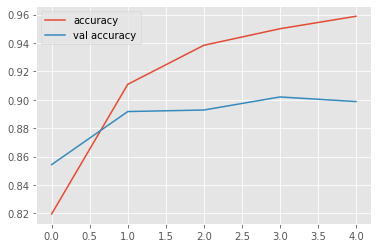

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

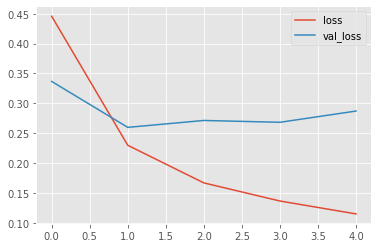

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


**Evaluación en test**


In [ ]:
pred = model.predict_classes(padded_sequence_test)
pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("Resultado de exactitud", accuracy)
print("Resultado F1-score", f1)

Resultado de exactitud 0.913382416630576
Resultado F1-score 0.7641509433962264


#**Conclusión Punto 1**

Con estos resultados podemos concluir que nuestro modelo de red neuronal LSTM se desempeña mejor respecto a los otros entrenados previamentes. Con este modelo se obtuvo un accuracy de 0.913 y un F1-Score de 0.76.

#Punto 2

Repita el ejercicio anterior con la técnica que más le convenga, de acuerdo a la ejercicio anterior, con los datos sentiment140 dataset..zip que contiene 1.6 millones de datos. Consulte la documentación en Kaggle.

In [55]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"

df = pd.read_csv("/content/drive/MyDrive/taller_sentimientos_topicos/training.1600000.processed.noemoticon.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


**Exploración de la variable objetivo**

Text(0.5, 1.0, 'Distribución de la variable objetivo')

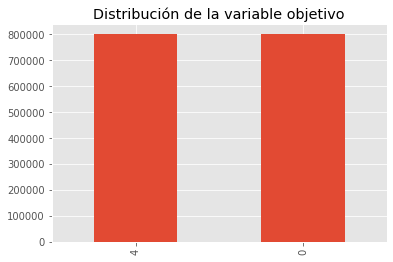

In [ ]:
df.target.value_counts().plot(kind='bar')
plt.title('Distribución de la variable objetivo')

**Arreglo de la variable objetivo**

0: Equivale a frases negativas y 1: Equivale a frases positivas

In [56]:
sentimento = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return sentimento[label]
df.target = df.target.apply(lambda x: label_decoder(x))
df.head()

,target,ids,date,flag,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


**Limpieza del texto**

Definición de algunas funciones útiles:

In [57]:
stop_words = stopwords.words('english')
text_limpio_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [58]:
def preprocesamiento(text, text_limpio, stem=False):

  lemmatizer = WordNetLemmatizer()   
  text = re.sub(text_limpio_re, ' ', str(text).lower())
  solo_letras= re.sub("[^a-zA-Z]", " ", text)  
  text = re.sub(r'\b\w{1,3}\b', '', solo_letras).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(lemmatizer.lemmatize(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

##################Limpieza del texto

df.text = df.text.apply(lambda x: preprocesamiento(x, text_limpio_re))

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww bummer shoulda david carr third
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting might result school today also blah
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save rest bounds
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving


**Tokenización**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 266136


**Entrenamiento**

In [ ]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30


In [ ]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Tamaño de entrenamiento:", len(train_data))
print("Tamaño de prueba", len(test_data))

Tamaño de entrenamiento: 1280000
Tamaño de prueba 320000


**Definiendo la secuencia**

In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Dimensión de X entrenamiento:",x_train.shape)
print("Dimensión de X de prueba:",x_test.shape)

Dimensión de X entrenamiento: (1280000, 30)
Dimensión de X de prueba: (320000, 30)


In [ ]:
labels = train_data.target.unique().tolist()

**Vectorización de la variable objetivo**

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.target.to_list())

y_train = encoder.transform(train_data.target.to_list())
y_test = encoder.transform(test_data.target.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


**Word Emdedding**

In [ ]:
#Vamos a utilizar el Glove para desarrollar nuestro clasificador

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-06-15 00:17:50--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-15 00:17:50--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-15 00:17:51--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

**Cargamos el emdedding**

In [80]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 7
MODEL_PATH = '/content/best_model.hdf5'

In [65]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Hay %s vectores de palabras.' %len(embeddings_index))

Hay 400000 vectores de palabras.


In [66]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

**Creación del modelo**

In [67]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

Definición de la arquitectura:

1)  Capa de incrustación - genera un vector de incrustación para cada secuencia de entrada.

2) Capa Conv1D - Se utiliza para convulsionar los datos en vectores de características más pequeños.

3) LSTM - es una variante de la RNN que tiene una célula de estado de memoria para aprender el contexto de las palabras que están más adelante en el texto y que tienen un significado contextual, en lugar de las palabras vecinas como en el caso de la RNN.

4)  Capas densas y totalmente conectadas para la clasificación

**Modelo**

In [71]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [74]:
model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics= ['accuracy', f1_m])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [76]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 30, 300)           79840800  
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 30, 300)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 26, 64)            96064     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_12 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0   

In [81]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/7
1250/1250 [==============================] - 1500s 1s/step - loss: 0.5171 - accuracy: 0.7420 - f1_m: 0.7458 - val_loss: 0.5005 - val_accuracy: 0.7535 - val_f1_m: 0.7511
Epoch 2/7
1250/1250 [==============================] - 1495s 1s/step - loss: 0.5049 - accuracy: 0.7507 - f1_m: 0.7542 - val_loss: 0.4942 - val_accuracy: 0.7573 - val_f1_m: 0.7638
Epoch 3/7
1250/1250 [==============================] - 1493s 1s/step - loss: 0.4980 - accuracy: 0.7552 - f1_m: 0.7588 - val_loss: 0.4920 - val_accuracy: 0.7587 - val_f1_m: 0.7560
Epoch 4/7
1250/1250 [==============================] - 1482s 1s/step - loss: 0.4939 - accuracy: 0.7584 - f1_m: 0.7619 - val_loss: 0.4891 - val_accuracy: 0.7613 - val_f1_m: 0.7666
Epoch 5/7
1250/1250 [==============================] - 1485s 1s/step - loss: 0.4901 - accuracy: 0.7605 - f1_m: 0.7637 - val_loss: 0.4880 - val_accuracy: 0.7614 - val_f1_m: 0.7665
Epoch 6/7
1250/1250 [==============================] - 1486s 1s/step - loss: 0.4871 - accuracy: 0.7627 - 

**Evaluaciòn del modelo**

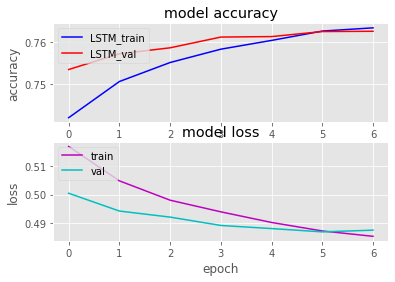

In [82]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [86]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 72s 2s/step


In [87]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

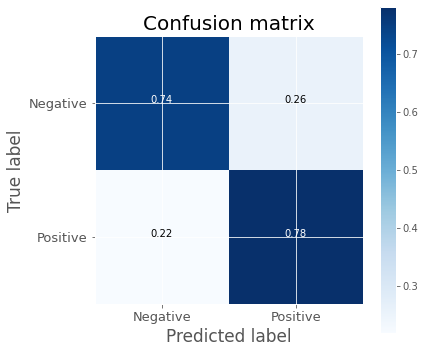

In [88]:
cnf_matrix = confusion_matrix(test_data.target.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.target.unique(), title="Confusion matrix")
plt.show()

In [90]:
print(classification_report(list(test_data.target), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.77      0.74      0.76    160542
    Positive       0.75      0.78      0.77    159458

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



#Punto 3
Haga un análisis de texto superficial completo con las palabras positivas y otro con las negativas por separado. Use fatstext y haga gráficas ilustrativas con TSNE. Apóyese en los cuadernos anexos

**Nube de palabras positivas**

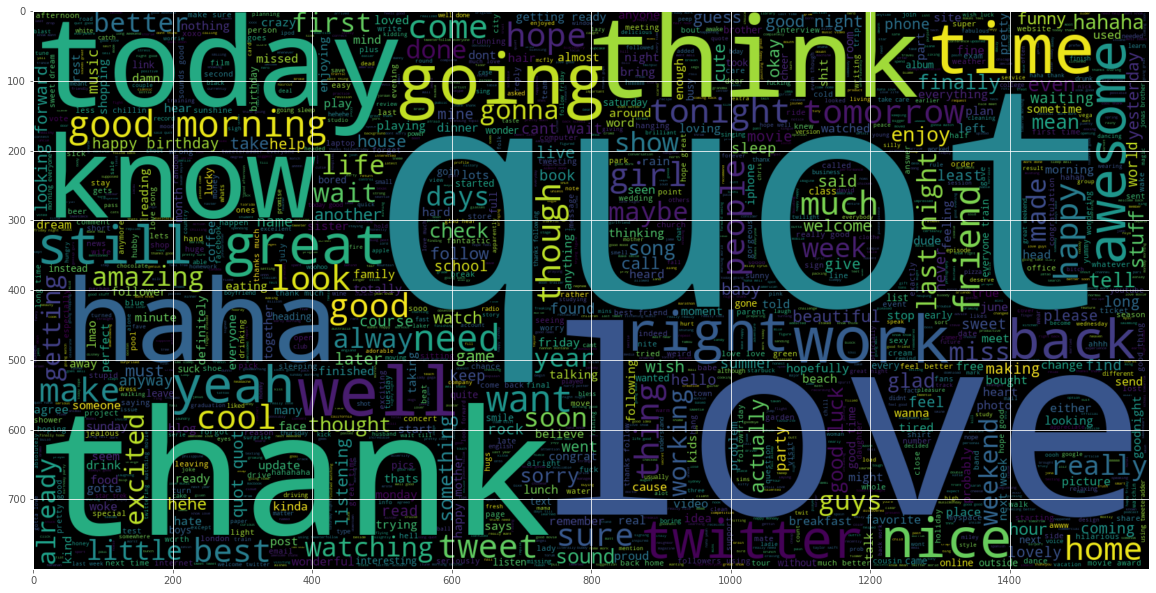

In [92]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

**Nube de palabras negativas**

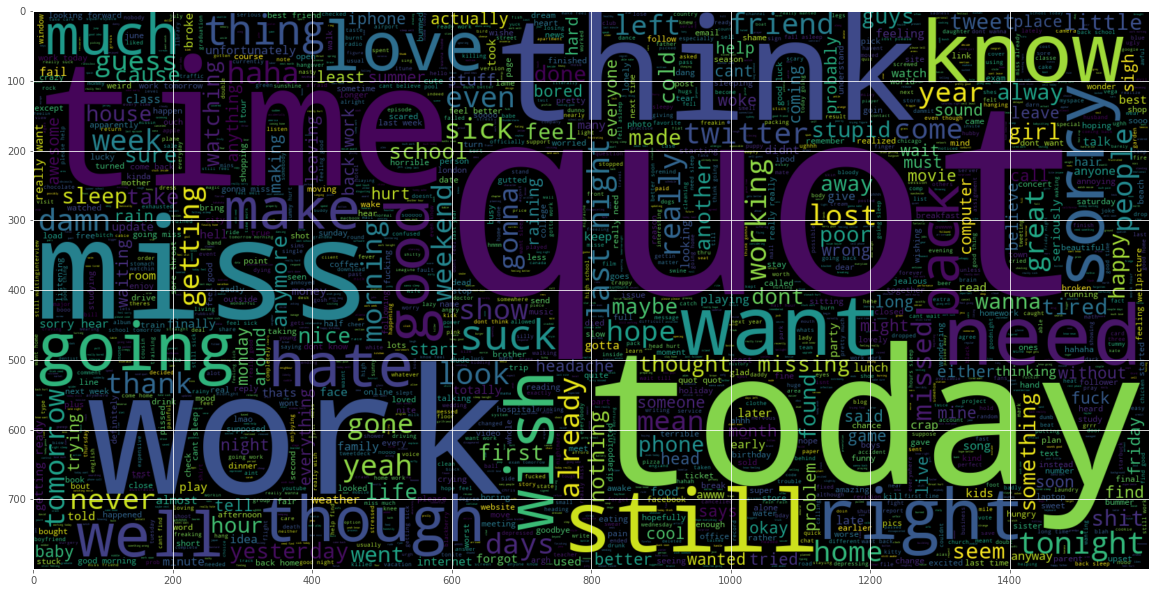

In [93]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

**Modelado de tópicos: Clusterización**

In [7]:
#Instalaciòn de dependencias
!pip install pyldavis

     |████████████████████████████████| 1.7MB 3.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 266kB/s 
     |████████████████████████████████| 9.9MB 34.9MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=aef83f0273b9d507405f44cdf0d9894dd697407f604d1f76f0dfce700103dbf4
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyldavis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [8]:
from pprint import pprint
#Gensim para modelado de temas, indexación de documentos y recuperación de similitudes con grandes corpus
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#Spacy para la lemmatization
import spacy
# Herramientas de graficado
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
# Habilitado de logging para gensim (opcional)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [21]:
df = df.sample(5000)

In [22]:
#Analizando el texto
data=df['text'].values.tolist()
#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

In [23]:
#CREACION DE N-GRAMAS
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['another', 'dull', 'overcast', 'bristol']


In [24]:
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)
#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#Vista
print("**El primer término es el Id de palabra y el segundo término es la frecuencia de ese Id de palabra en el texto:",corpus[:1])

**El primer término es el Id de palabra y el segundo término es la frecuencia de ese Id de palabra en el texto: [[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [17]:
'''
Donde:
update_every es la frecuencia de actualizacion de los parámetros
chunksize es la cantidad de documentos usados para entrenar el modelo
passes es el número total de entrenamientos para la convergencia del modelo 
'''
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)

In [18]:
#Visualizacion de los tópicos generados en el modelo LDA
'''Palabras clave para cada topico y la respectiva importancia de cada palabra clave usada'''
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"going" + 0.023*"home" + 0.021*"miss" + 0.015*"gonna" + 0.011*"life" '
  '+ 0.010*"wait" + 0.010*"people" + 0.010*"already" + 0.009*"cant" + '
  '0.009*"away"'),
 (1,
  '0.028*"really" + 0.026*"know" + 0.025*"like" + 0.020*"twitter" + '
  '0.017*"hope" + 0.017*"feel" + 0.017*"need" + 0.016*"haha" + 0.013*"sorry" + '
  '0.013*"right"'),
 (2,
  '0.036*"quot" + 0.029*"today" + 0.028*"work" + 0.025*"night" + 0.019*"want" '
  '+ 0.019*"much" + 0.018*"morning" + 0.017*"tomorrow" + 0.014*"sleep" + '
  '0.011*"getting"'),
 (3,
  '0.032*"back" + 0.024*"well" + 0.021*"still" + 0.019*"thanks" + 0.017*"wish" '
  '+ 0.012*"watching" + 0.012*"school" + 0.012*"could" + 0.011*"even" + '
  '0.011*"soon"'),
 (4,
  '0.042*"good" + 0.025*"time" + 0.024*"love" + 0.020*"think" + 0.017*"last" + '
  '0.017*"great" + 0.015*"come" + 0.013*"nice" + 0.013*"like" + 0.012*"make"')]


In [19]:
#Calculo de la Perplejidad

'''
Un buen modelo debe tener perplejidad baja (evasión de probabilidades demasiados pequeñas) en tanto que la coherencia debe ser alta
Una relación de coherencia explica cómo el significado de diferentes unidades textuales puede combinarse para construir
un significado discursivo mayor (Jurafsky y Martin 2008: 605)
'''
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # una medida del desempeñi del modelo. Entre más bajo mejor.

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.297412319566067

Coherence Score:  0.15946121190493273


In [20]:
pyLDAvis.enable_notebook()
#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model
#Parametros de visualizacion
data = pyLDAvis.gensim_models.prepare(lda, c, d)

In [21]:
data 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.272513 -0.222857       1        1  21.302876
4     -0.213951 -0.124166       2        1  21.009397
1     -0.204295 -0.057400       3        1  20.185154
3      0.031745  0.287683       4        1  18.941920
0      0.113989  0.116740       5        1  18.560652, topic_info=          Term         Freq        Total Category  logprob  loglift
68        good  5010.000000  5010.000000  Default  30.0000  30.0000
47        quot  4294.000000  4294.000000  Default  29.0000  29.0000
87       going  3864.000000  3864.000000  Default  28.0000  28.0000
79        back  3424.000000  3424.000000  Default  27.0000  27.0000
147      today  3464.000000  3464.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
191    waiting   454.181180   454.912442   Topic5  -5.4357   1.6825
489   headache   445.765125   446.499337   Topic5  -5.4544   1.6825
680       must   424.326748   425.063978   Topic5  -5.5037   1.6824
1343      sooo   421.810021   422.545747   Topic5  -5.5096   1.6824
231      stuff   422.772271   423.510322   Topic5  -5.5073   1.6824

[191 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
341       2  0.998229   actually
589       5  0.999567    already
70        1  0.998794     always
1007      3  0.999636    amazing
495       1  0.999054    another
...     ...       ...        ...
78        3  0.662800      would
78        4  0.337017      would
41        3  0.999350       yeah
481       1  0.998637       year
677       5  0.998471  yesterday

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 4, 1])

**Fast text y word2vec**

In [25]:
from gensim.models import Word2Vec

from collections import defaultdict 
 
#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]



##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=1,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)



**Visualización**

In [ ]:
# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words


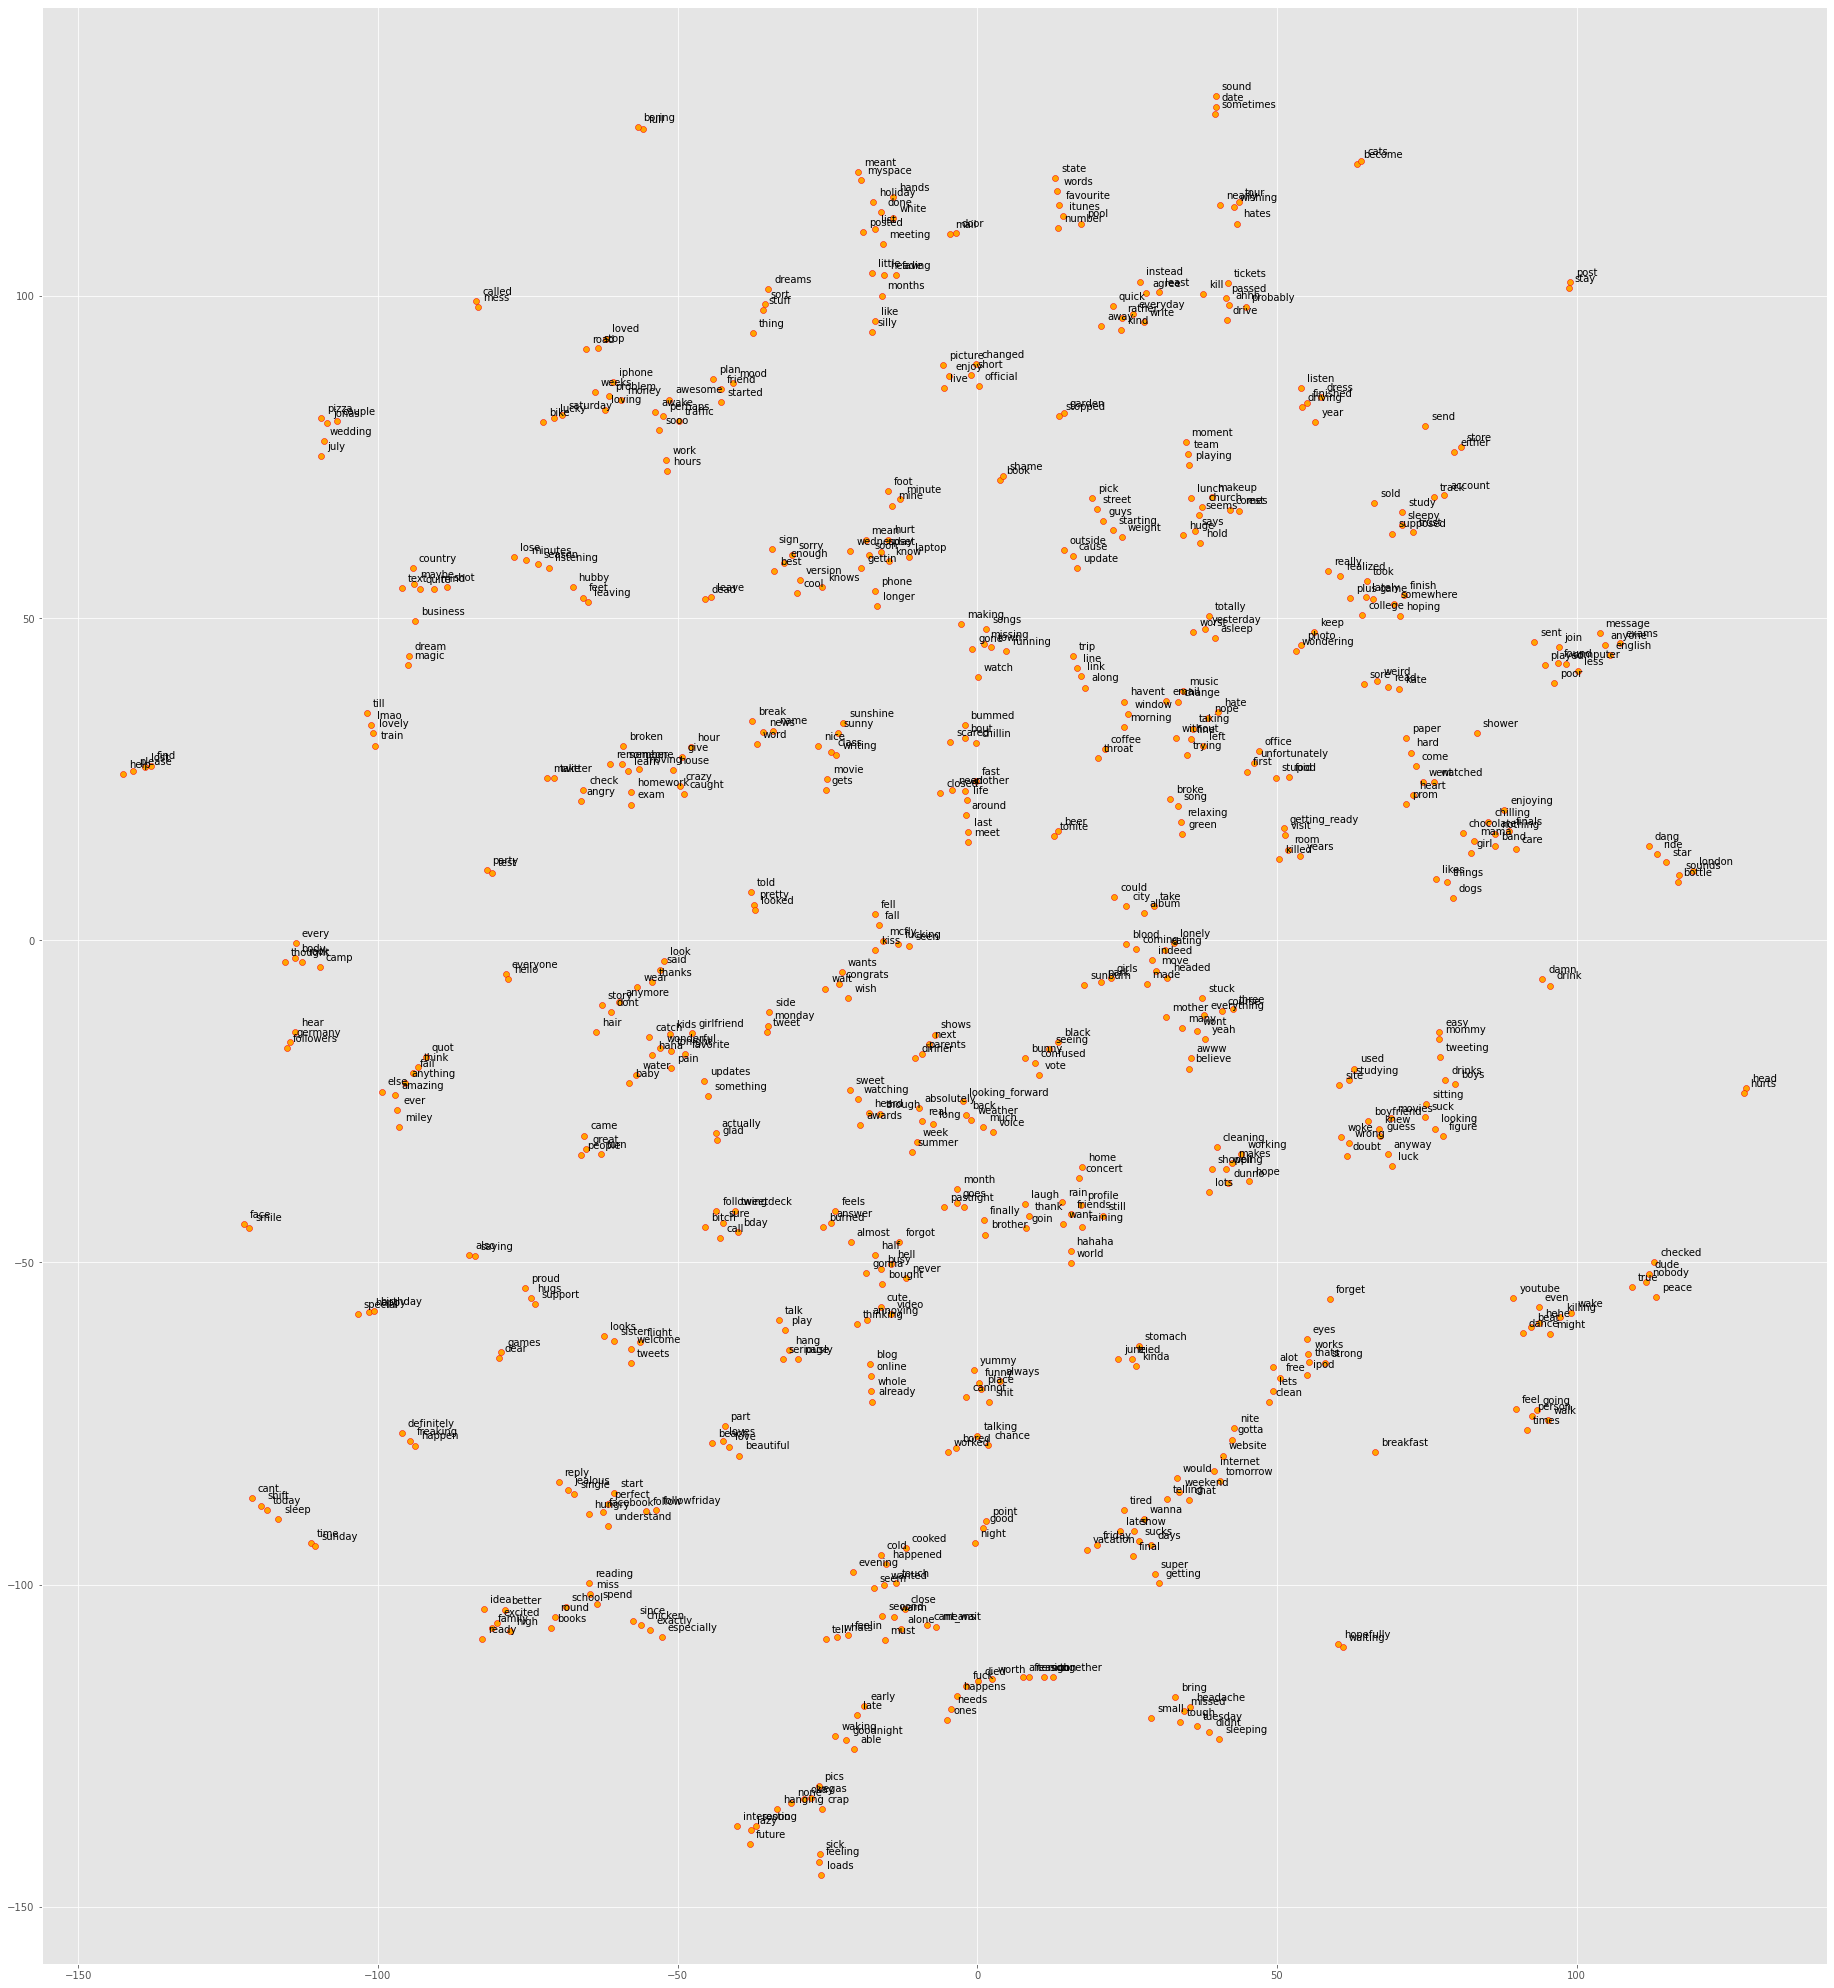

In [28]:
plt.figure(figsize=(32, 36))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

**Fast text**

In [72]:
!pip install fasttext
!pip uninstall pandas
!pip install pandas==1.1.5

Uninstalling pandas-1.2.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.2.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.2.4
     |████████████████████████████████| 9.5MB 3.9MB/s 
ERROR: pyldavis 3.3.1 has requirement pandas>=1.2.0, but you'll have pandas 1.1.5 which is incompatible.


In [73]:
yTRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30
df = df[['text','target']]
df['target'] = df['target'].apply(lambda x: x.lower())

#forma necesaria para que el modelo entienda el input
df.iloc[:, 1] = df.iloc[:, 1].apply(lambda x: '__label__' + x)
df = df[['target','text']]
#df['text'] = df['target']+' '+ df['text']
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Tamaño de entrenamiento:", len(train_data))
print("Tamaño de prueba", len(test_data))

Tamaño de entrenamiento: 1280000
Tamaño de prueba 320000


In [75]:
train_data.to_csv(r'/content/train.txt', index=False, sep=' ', header=False)

In [76]:
test_data.to_csv(r'/content/test.txt', index=False, sep=' ', header=False)

**Entrenando el modelo**

In [77]:
model = fasttext.train_supervised(input="/content/train.txt")

In [78]:
print(model.words)
print(model.labels)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Evaluar los resultados**

In [79]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

print_results(*model.test('/content/test.txt'))

N	320000
P@1	0.763
R@1	0.763


**En el resultado anterior se tiene que P@1 significa la presición y R@1 la exhaustividad**